## Assignment 3: Introduction to Data Science and A

### Module 3 Group 32 :Seyedehnaghmeh Mosaddeghi(10 h)- Aghigh Merikhi(10 h)

Introduction:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")


### 1. Protein Angle Dataset

In [ ]:
# Loading the data
pro_angle_df = pd.read_csv("protein-angle-dataset.csv")
print(pro_angle_df.shape)
pro_angle_df.head(10)

(29369, 5)


,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520
5,TYR,15,A,-91.504388,123.866914
6,CYS,16,A,-93.197858,118.520749
7,SER,17,A,-47.624937,-52.194897
8,ASN,18,A,-64.047729,105.183729
9,GLY,19,A,93.478288,-26.252796


1.1  Show the distribution of phi and psi combinations using:
(a) a scatter plot

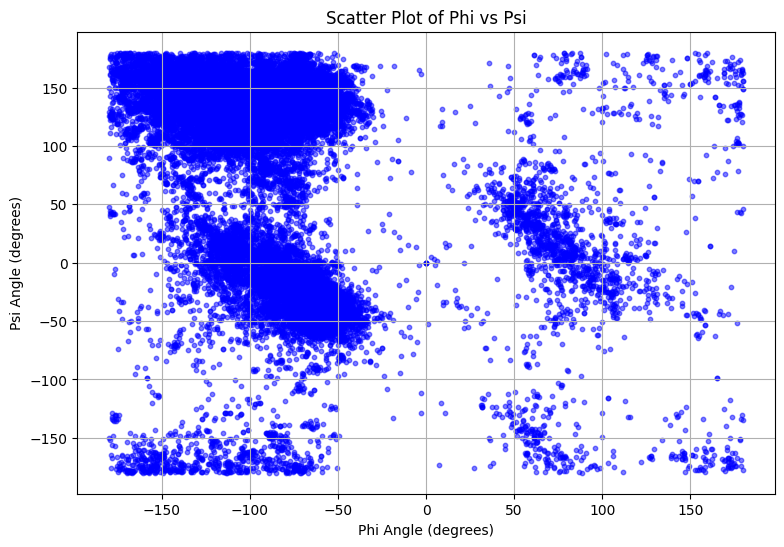

In [ ]:
# Scatter plot
plt.figure(figsize=(9, 6))
plt.scatter(x='phi', y='psi', data=pro_angle_df, alpha=0.5, c='b', s=10)
plt.xlabel('Phi Angle (degrees)')
plt.ylabel('Psi Angle (degrees)')
plt.title('Scatter Plot of Phi vs Psi')
plt.grid(True)
plt.show()

(b) a 2D histogram

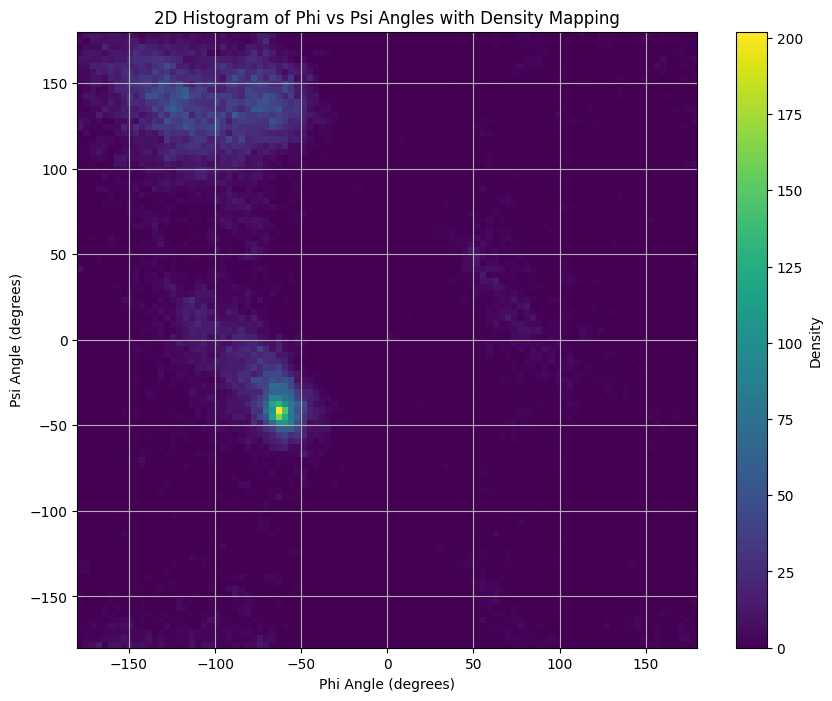

In [ ]:
plt.figure(figsize=(10, 8))

# Defining the data and bins
x = pro_angle_df['phi']
y = pro_angle_df['psi']
bins = 100

# Creating a 2D histogram
hist, x_edges, y_edges = np.histogram2d(x, y, bins=bins)
plt.pcolormesh(x_edges, y_edges, hist.T, cmap='viridis')
plt.colorbar(label='Density')

plt.xlabel('Phi Angle (degrees)')
plt.ylabel('Psi Angle (degrees)')
plt.title('2D Histogram of Phi vs Psi Angles with Density Mapping')
plt.grid(True)
plt.show()

Can you modify them for better visualization?

To modify the visualization, first we can change the range values on x and y axis to focus on important areas to achieve more detail. And second, we can change the colormap colors to visualize the changes better.

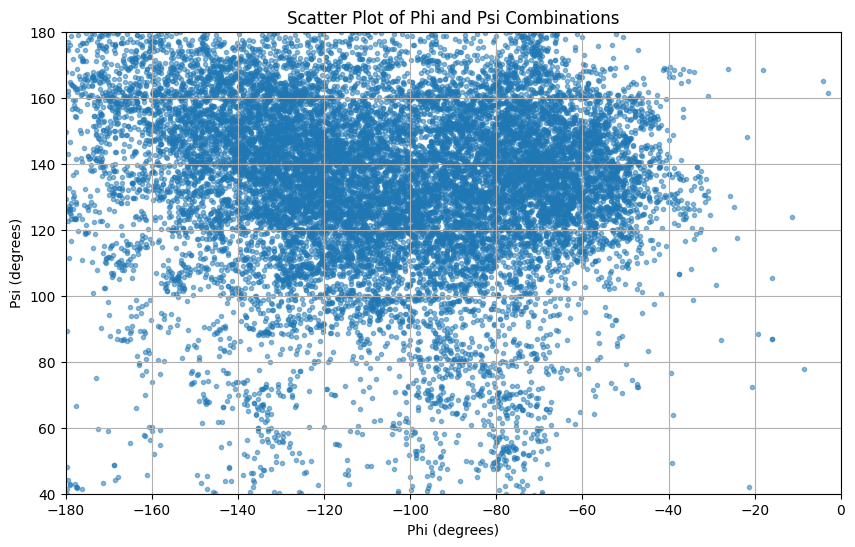

In [ ]:
# Creating a scatter plot with adjusted axis limits
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, marker='.')
plt.title('Scatter Plot of Phi and Psi Combinations')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.xlim(-180, 0)  
plt.ylim(40, 180)  
plt.grid(True)

(40.0, 180.0)

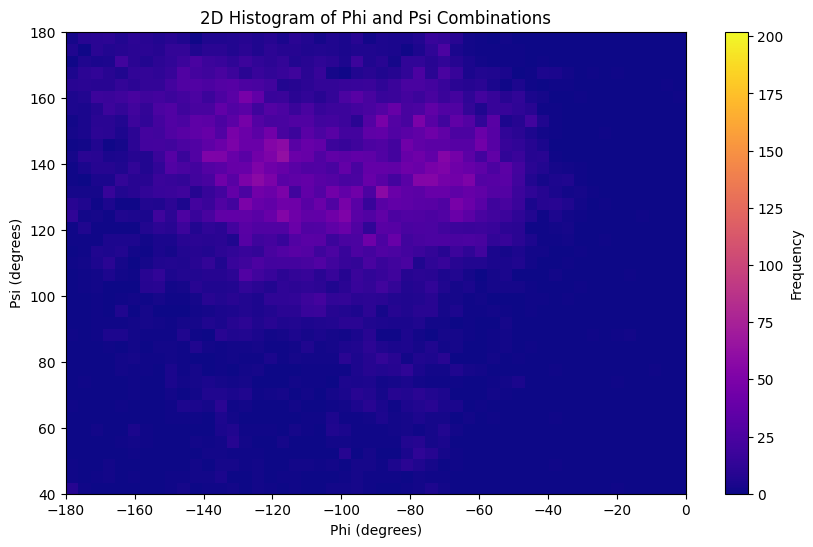

In [ ]:
# Creating a 2D histogram with a different colormap and colorbar label
plt.figure(figsize=(10, 6))
plt.hist2d(x, y, bins=(100, 100), cmap='plasma')
plt.colorbar(label='Frequency') 
plt.title('2D Histogram of Phi and Psi Combinations')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.xlim(-180, 0)
plt.ylim(40, 180) 


1.2 Use the k-means clustering method to cluster the phi and psi angle combinations in the data file.

(a) Experiment with different values of k. Suggest an appropriate value of k for this task and motivate this choice.

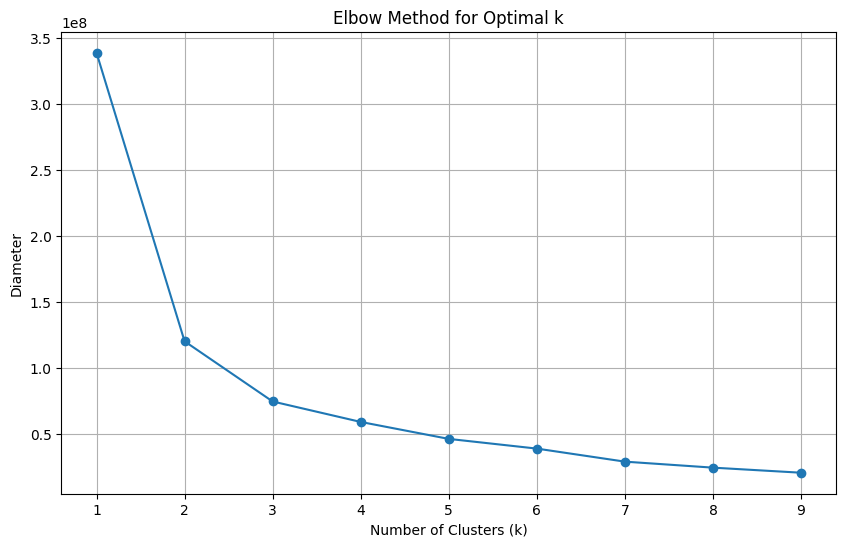

In [ ]:
angles = pro_angle_df[['phi', 'psi']]

# An empty list to store inertia values
inertia_values = []

# different values of k
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(angles)
    
    # Appending the inertia value for this k to the list
    inertia_values.append(kmeans.inertia_)

# Ploting the inertia values for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Diameter')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In a K-means clustering analysis, the elbow approach is used to determine the ideal number of clusters (k). We applied K-means clustering on a set of k values: We began by running K-means clustering on the dataset for k values, from 1 to 10, and conducted K-means clustering on each of them. Then we used Sum of Squares distances from each data point to its assigned cluster centroid for each value of k. As figure shows a falling trend can be seen as k increases because increasing the number of clusters reduces within cluster distances. Then we select the elbow point as the point that the rate of reduction in the plot begins to moderate. The k value corresponding to the plot's "elbow" point is considered as the best number of clusters for the dataset. According to our elbow plot, the elbow point can be chosen in k=3. In the next part, we will try to visualize the clustering for different k values and validate our choice.

(b) Do the clusters found in part (a) seem reasonable?

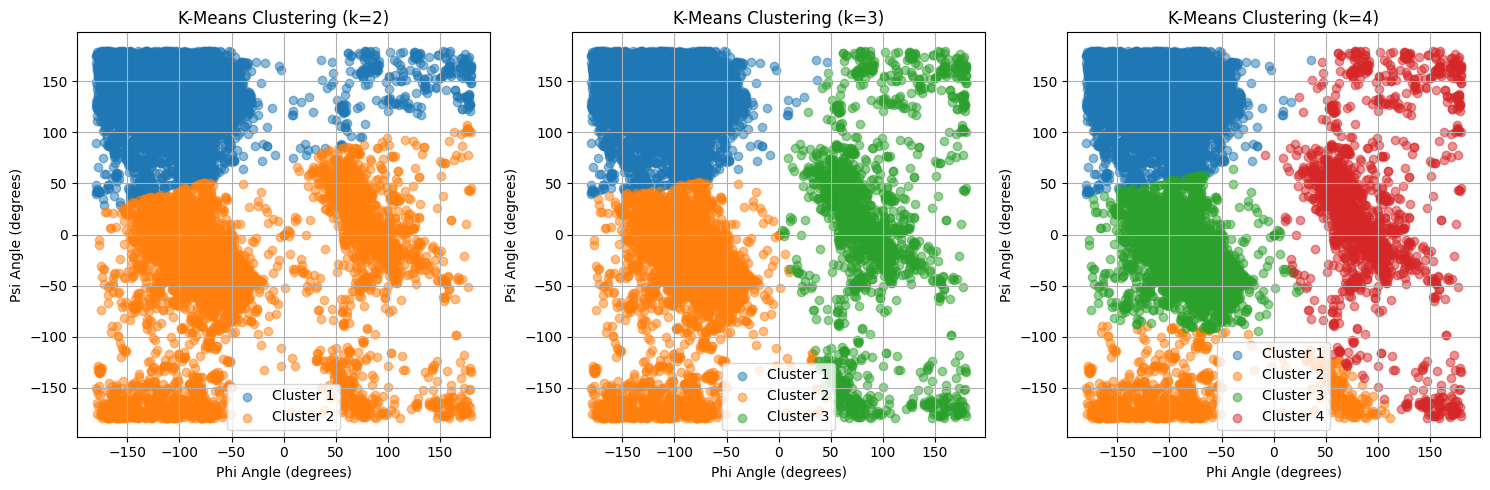

In [ ]:
# Values of k to compare
k_values = [2, 3, 4]

# Creating subplots for each k
plt.figure(figsize=(15, 5))

for i, chosen_k in enumerate(k_values):
    # Performing k-means clustering
    kmeans = KMeans(n_clusters=chosen_k, random_state=0)
    pro_angle_df['cluster'] = kmeans.fit_predict(angles)

    # Creating a subplot for this k
    plt.subplot(1, 3, i + 1)
    for cluster_id in range(chosen_k):
        cluster_data = pro_angle_df[pro_angle_df['cluster'] == cluster_id]
        plt.scatter(cluster_data['phi'], cluster_data['psi'], label=f'Cluster {cluster_id + 1}', alpha=0.5)

    plt.xlabel('Phi Angle (degrees)')
    plt.ylabel('Psi Angle (degrees)')
    plt.title(f'K-Means Clustering (k={chosen_k})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

From comparing the scatter plots of each selected k value, it can be seen that the most appropriate value for k is 3. Since in this clustering, the most relatable data are clustered together. On the other hand, se can not say that this is the best clustering that can be but in all k values until now, k=3 is the best choice. 

1.3 se the DBSCAN method to cluster the phi and psi angle combinations in the data file.
(a) Motivate the choice of:
i. the minimum number of samples in the neighborhood for a point to be considered as a core point, and
ii. the maximum distance between two samples belonging to the same neighborhood (“eps” or “epsilon”).
Compare the clusters found by DBSCAN with those found using k-means.
(b) Highlight the clusters found using DBSCAN and any outliers in a scatter plot.
(c) How many outliers are found? Plot a bar chart to show how often each of the amino acid residue types are outliers

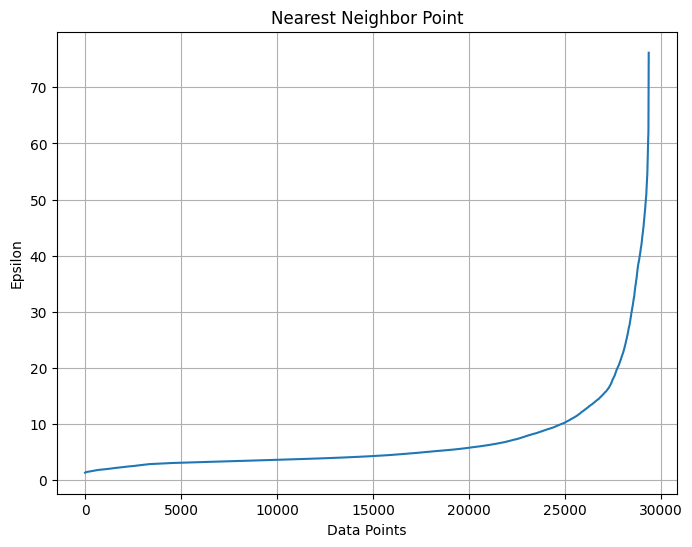

In [ ]:
# Fiting nearest neighbor model
nn_model = NearestNeighbors(n_neighbors=100)
nn_model.fit(angles)

# Calculating distances to nearest neighbors
distances, _ = nn_model.kneighbors(angles)

# Calculating the distance
k_distances = distances[:, -1]

# Sorting the distances
sorted_distances = np.sort(k_distances)

# Ploting the Nearest Neighbor Curve
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(sorted_distances) + 1), sorted_distances)
plt.title('Nearest Neighbor Point')
plt.xlabel('Data Points')
plt.ylabel('Epsilon')
plt.grid(True)
plt.show()


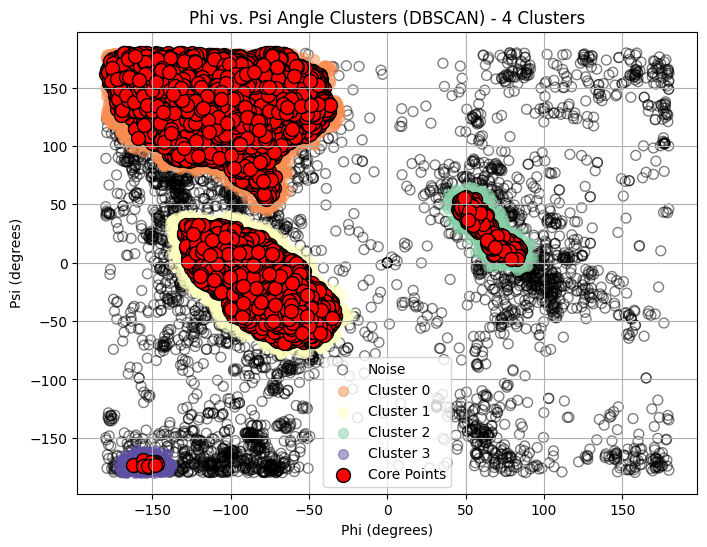

Number of clusters (excluding noise): 4
Number of core points: 24831
Number of noise/border points: 2910


In [ ]:
# Defining minimum sample points
min_samples = 100

# Defining epsilon
eps = 10

# Creating a DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fiting the DBSCAN model to the angles
clusters = dbscan.fit_predict(angles)

# Adding the cluster labels to the original data
pro_angle_df['cluster'] = clusters

plt.figure(figsize=(8, 6))

# Computing unique cluster labels
unique_clusters = np.unique(clusters)

# Determining the number of clusters (excluding noise) in the dataset
num_clusters = len(unique_clusters) - 1 if -1 in clusters else len(unique_clusters)

# Creating a mask to identify core points in the clustering
core_samples_mask = np.zeros_like(clusters, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Creating a colormap
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_clusters)))

for i, cluster in enumerate(unique_clusters):
    if cluster == -1:
        # Noise points
        noise_points = pro_angle_df[pro_angle_df['cluster'] == -1]
        plt.scatter(
            noise_points['phi'], noise_points['psi'],
            c='none', edgecolors='black', label='Noise', alpha=0.5, marker='o', s=50,
        )
    else:
        # Clustered points
        cluster_data = pro_angle_df[pro_angle_df['cluster'] == cluster]
        plt.scatter(
            cluster_data['phi'], cluster_data['psi'],
            label=f'Cluster {cluster}', alpha=0.5, marker='o', s=50, c=[colors[i]],
        )

# Ploting core points 
core_points = angles[core_samples_mask]
plt.scatter(core_points['phi'], core_points['psi'], c='red', edgecolors='black', marker='o',
            s=100, label='Core Points')

plt.title(f'Phi vs. Psi Angle Clusters (DBSCAN) - {num_clusters} Clusters')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')

plt.legend()
plt.grid(True)
plt.show()

# Identifying noise and border points based on cluster labels
noise_border_points = angles[clusters == -1]

# Storing noise points in a DataFrame
outliers_df = pro_angle_df[pro_angle_df['cluster'] == -1]

# Printing the number of clusters, core points, and noise/border points
print(f'Number of clusters (excluding noise): {num_clusters}')
print(f'Number of core points: {core_points.shape[0]}')
print(f'Number of noise/border points: {noise_border_points.shape[0]}')



i. The density of the data determines the minimal number of samples in the neighborhood for a point to be regarded as a core point. A larger minimum sample size can be chosen if the data is dense, while a smaller minimum sample size can be chosen if the data is sparse. A lower value of the minimum samples will produce more clusters and fewer noise points, whereas a larger number will produce fewer clusters and more noise points. The minimum number of sample points was also chosen to be 100 by the trial and error. By changing this value, the best accurate clustering was chosen. 

ii. Epsilon is the maximum distance that two neighbor data points can be considered in a same cluster. If the epsilon is too large, the data points that are even far from each other can be considered in the same cluster and it results in smaller number of clusters. And if epsilon is too small, it results in more number of clusters. In order to find the best maximum distance between sample belonging to the same neighborhood, we decided to use the elbow method in the showing plot. An can be seen, from the distance 10, distances begin to increase to very high amounts. By this approach, we chose 10 as the representative of the distance between two samples belonging to the same neighborhood (epsilon).

(b). As it can be seen, the number of clusters in DBSCAN method is 4 cluster which is higher than the chosen k value in k means approach. In this approach (DBSCAN), the data at the left bottom corner of the plot are considered to be in another cluster which can be true since the distance between there data and other clusters are relatively high. Considering part of data as outliers is on of the main steps in DBSCAN method. But in our clustering, we can see that large number of data especially in the left bottom corner which have high density are considered to be outliers and are not included in the clustering. This can be one of the problems of this clustering but generally we can conclude that DBSCAN method has clustered our data more accurate.

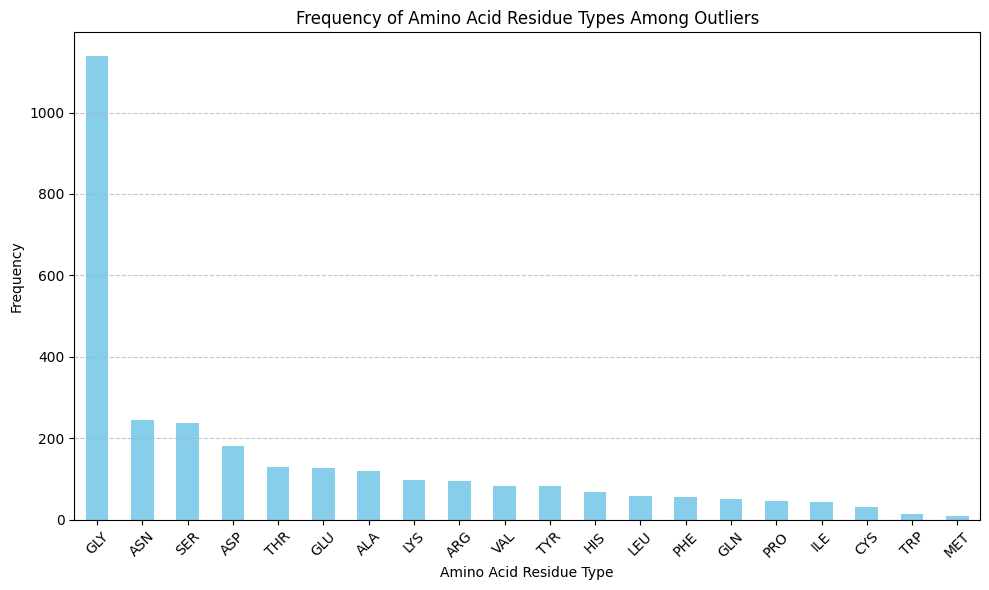

Total number of outliers: 2910


In [ ]:
# Geting the labels assigned by DBSCAN
labels = pro_angle_df['cluster']

# Counting the number of outliers
num_outliers = (labels == -1).sum()

# Filtering the DataFrame to only include outliers
outliers_df = pro_angle_df[labels == -1]

# Counting the frequency of each residue type among the outliers
residue_type_counts = outliers_df['residue name'].value_counts()

# Ploting the bar chart of outlier counts
plt.figure(figsize=(10, 6))
residue_type_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Amino Acid Residue Types Among Outliers')
plt.xlabel('Amino Acid Residue Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f'Total number of outliers: {num_outliers}')

(C)The number of outlier data is 2910 between 29369 total data. from the bar chart plot we can also see that mostly GLY amino acid data has been considered as outlier data with large difference with other amino acid types (about half of the outlier data is from GLY amino acid).

1.4 The data file can be stratified by amino acid residue type. Use DBSCAN to cluster the data that have residue type PRO. Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters (i.e., the clusters that you get from DBSCAN with mixed residue types in question 3). Note: the parameters might have to be adjusted from those used in question 3.

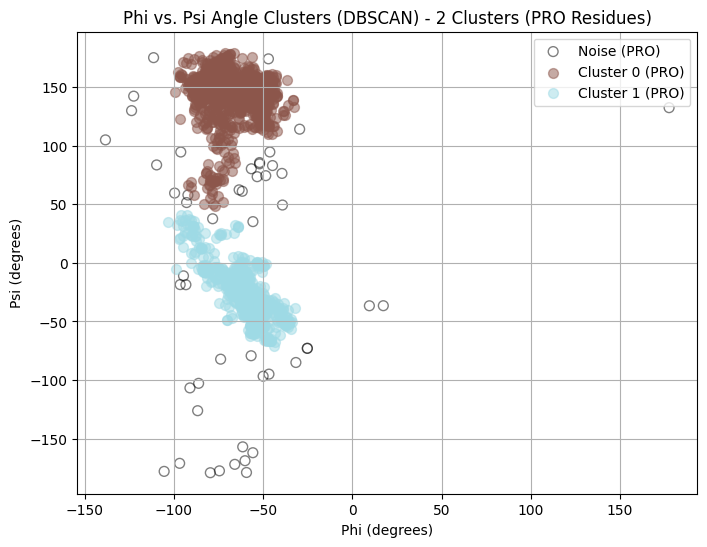

In [ ]:


# Filtering the data to include only amino acid residues of type PRO
pro_data = pro_angle_df[pro_angle_df['residue name'] == 'PRO']
pro_angles = pro_data[['phi', 'psi']]


# Choosing values for min_samples and eps for PRO residues
pro_min_samples =10
pro_eps = 10

# Performing DBSCAN clustering for PRO residues
pro_dbscan = DBSCAN(eps=pro_eps, min_samples=pro_min_samples)
pro_clusters = pro_dbscan.fit_predict(pro_angles)

# Adding cluster labels to the original DataFrame for PRO residues
pro_data['cluster'] = pro_clusters

# Computing unique cluster labels for PRO residues
unique_pro_clusters = np.unique(pro_clusters)

# Determining the number of clusters in the PRO residue dataset
num_pro_clusters = len(unique_pro_clusters) - 1 if -1 in pro_clusters else len(unique_pro_clusters)

# Ploting clusters for PRO residues
plt.figure(figsize=(8, 6))

colors = plt.cm.get_cmap('tab20', len(unique_pro_clusters)).colors

for i, cluster in enumerate(unique_pro_clusters):
    if cluster == -1:
        noise_points = pro_data[pro_data['cluster'] == -1]
        plt.scatter(
            noise_points['phi'], noise_points['psi'],
            c='none', edgecolors='black', label='Noise (PRO)', alpha=0.5, marker='o', s=50,
        )
    else: 
        cluster_data = pro_data[pro_data['cluster'] == cluster]
        plt.scatter(
            cluster_data['phi'], cluster_data['psi'],
            label=f'Cluster {cluster} (PRO)', alpha=0.5, marker='o', s=50, c=[colors[i]],
        )

plt.title(f'Phi vs. Psi Angle Clusters (DBSCAN) - {num_pro_clusters} Clusters (PRO Residues)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')


plt.legend()
plt.grid(True)


plt.show()



If we change the epsilon value to 10 and minimum sample points to 10 (with the same approach we used in question 3), we will have two clusters which contain nearly all the data except the noise data.  If we compare this clustering with clustering of all the data, we can see that these two clusters are at the same location of two large clusters in the original data clustering. This suggests that the PRO data points do not significantly deviate from the distribution as a whole.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=05d86ed7-77dc-4d57-baa3-23063c711d41' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>